### Analysis of Query Data

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

In [99]:
openCloseData = pd.read_csv('openCloseData.csv')
print(openCloseData.shape)

(159996, 35)


In [100]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [101]:
openCloseData.replace(np.nan,0,inplace=True)  #replacing NaN to 0
openCloseData.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0

In [102]:
openData = openCloseData[openCloseData['closed'] == 0]
closeData = openCloseData[openCloseData['closed'] == 1]
print((openData.shape, closeData.shape))

((80000, 35), (79996, 35))


### 1. Lower to Upper Ratio

In [103]:
max_low_up_ratio_o = np.max(openData['lowerUpperRatio'])
min_low_up_ratio_o = np.min(openData['lowerUpperRatio'])
avg_low_up_ratio_o = np.mean(openData['lowerUpperRatio'])
max_low_up_ratio_c = np.max(closeData['lowerUpperRatio'])
min_low_up_ratio_c = np.min(closeData['lowerUpperRatio'])
avg_low_up_ratio_c = np.mean(closeData['lowerUpperRatio'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_low_up_ratio_o) + '\t\t' + str(max_low_up_ratio_c))
print('Minimum\t\t' + str(min_low_up_ratio_o) + '\t\t' + str(min_low_up_ratio_c))
print('Average\t\t' + str(avg_low_up_ratio_o) + '\t' + str(avg_low_up_ratio_c))
print('Mode\t\t' + str(stat.mode(openData['lowerUpperRatio'])) + '\t\t' + str(stat.mode(closeData['lowerUpperRatio'])))
print('Median\t\t' + str(stat.median(openData['lowerUpperRatio'])) + '\t\t' + str(stat.median(closeData['lowerUpperRatio'])))

Value		Open		Close
Maximum		1740.6		1453.0
Minimum		0.0		0.0
Average		25.11045803947951	31.490305117889825
Mode		21.0		0.0
Median		18.92857143		24.11111111


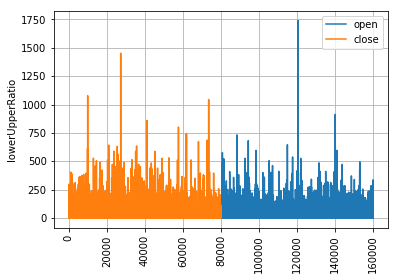

In [105]:
plt.figure()
plt.plot(openData['lowerUpperRatio'], label = 'open')
plt.plot(closeData['lowerUpperRatio'], label = 'close')
plt.xticks(rotation='vertical')
plt.ylabel('lowerUpperRatio')
plt.legend()
plt.grid(True)
plt.show()

				No. of Questions vs Ratio of Lowercase and Uppercase letters



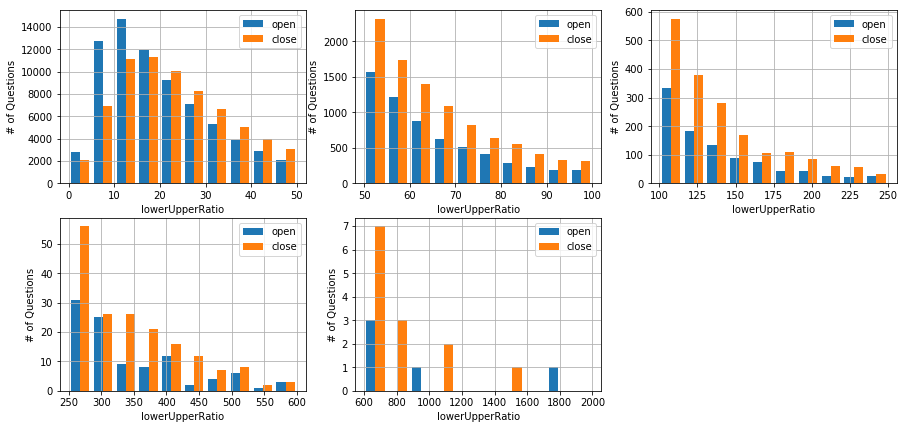

In [125]:
def hist_plot_range(min_value, max_value, col):
    """ To plot histogram using the 'col' field of Dataset for the values in the range 'min_value' - 'max_value' """
    plt.hist([openData[col],closeData[col]], range=(min_value, max_value), label = ['open', 'close'])
    plt.xlabel(col)
    plt.ylabel('# of Questions')
    plt.grid(True)
    plt.legend()
  
print('\t\t\t\tNo. of Questions vs Ratio of Lowercase and Uppercase letters\n')

plt.figure(figsize = (15,7))
range_list = [(0,50),(50,100),(100,250),(250,600),(600,2000)]

for i in range(5):
    plt.subplot(2, 3, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'lowerUpperRatio')
    
plt.show()

# No. of close Questions < open Questions when ratio is less than 20.

### 2. Sentence Count

In [107]:
max_sen_o = np.max(openData['sentenceCount'])
min_sen_o = np.min(openData['sentenceCount'])
avg_sen_o = np.mean(openData['sentenceCount'])
max_sen_c = np.max(closeData['sentenceCount'])
min_sen_c = np.min(closeData['sentenceCount'])
avg_sen_c = np.mean(closeData['sentenceCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_sen_o) + '\t\t' + str(max_sen_c))
print('Minimum\t\t' + str(min_sen_o) + '\t\t' + str(min_sen_c))
print('Average\t\t' + str(avg_sen_o) + '\t' + str(avg_sen_c))
print('Mode\t\t' + str(stat.mode(openData['sentenceCount'])) + '\t\t' + str(stat.mode(closeData['sentenceCount'])))
print('Median\t\t' + str(stat.median(openData['sentenceCount'])) + '\t\t' + str(stat.median(closeData['sentenceCount'])))

Value		Open		Close
Maximum		2039		5579
Minimum		0		0
Average		21.4607375	9.877556377818891
Mode		4		3
Median		10.0		6.0


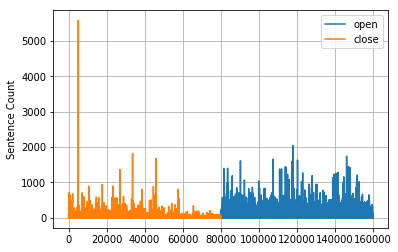

In [108]:
plt.figure()
plt.plot(openData['sentenceCount'], label = 'open')
plt.plot(closeData['sentenceCount'], label = 'close')
plt.ylabel('Sentence Count')
plt.grid(True)
plt.legend()
plt.show()

						No. of Questions vs Sentence Count



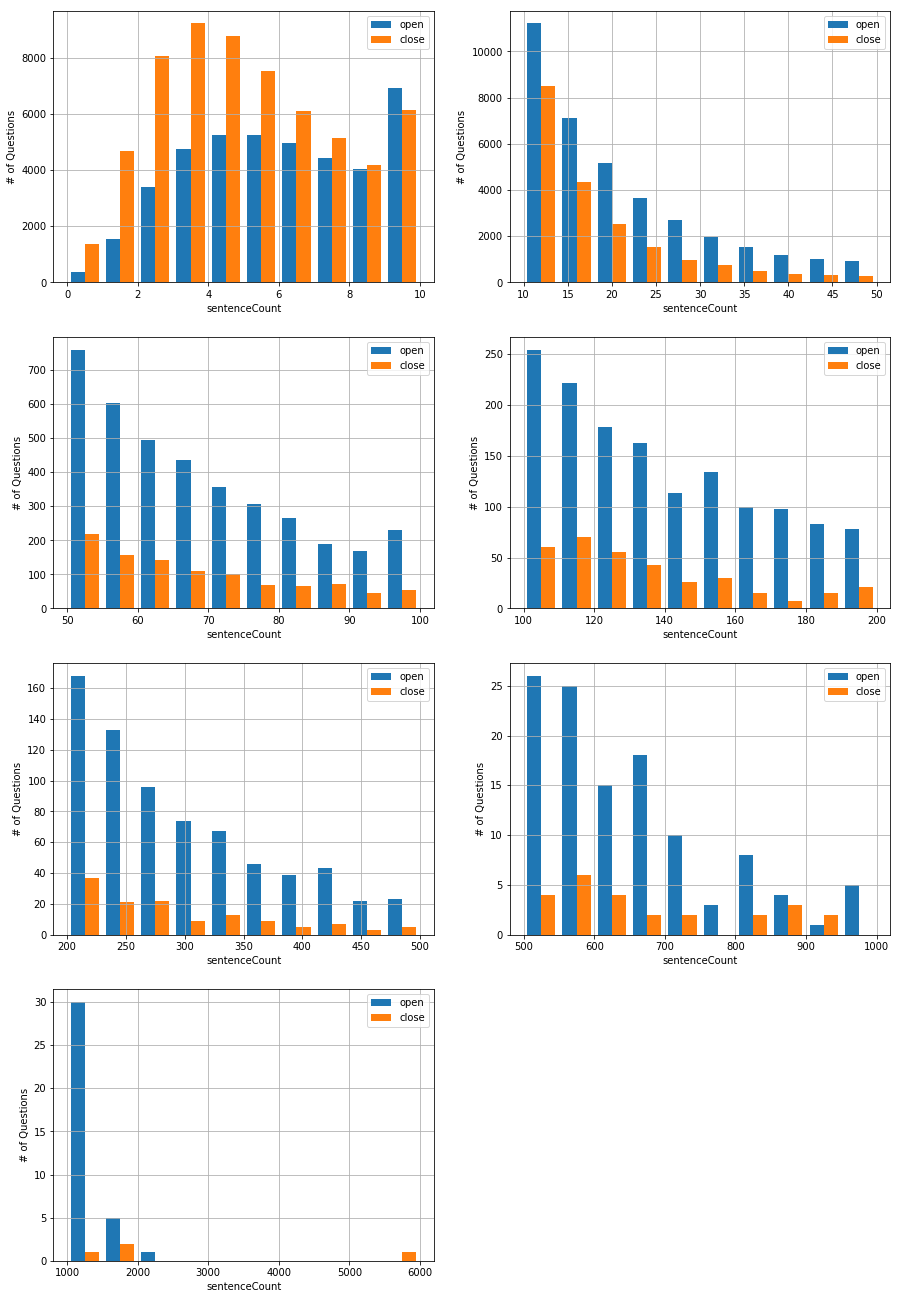

In [137]:
print('\t\t\t\t\t\tNo. of Questions vs Sentence Count\n')

plt.figure(figsize = (15,23))
range_list = [(0, 10),(10,50),(50,100),(100,200),(200, 500),(500,1000),(1000,6000)]

for i in range(7):
    plt.subplot(4, 2, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'sentenceCount')
    
plt.show()

# No. of Closed Questions > Open Questions when sentence count <= 9

### 3. First Line Length

In [110]:
max_fll_o = np.max(openData['firstLineLength'])
min_fll_o = np.min(openData['firstLineLength'])
avg_fll_o = np.mean(openData['firstLineLength'])
max_fll_c = np.max(closeData['firstLineLength'])
min_fll_c = np.min(closeData['firstLineLength'])
avg_fll_c = np.mean(closeData['firstLineLength'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_fll_o) + '\t\t' + str(max_fll_c))
print('Minimum\t\t' + str(min_fll_o) + '\t\t' + str(min_fll_c))
print('Average\t\t' + str(avg_fll_o) + '\t' + str(avg_fll_c))
print('Mode\t\t' + str(stat.mode(openData['firstLineLength'])) + '\t\t' + str(stat.mode(closeData['firstLineLength'])))
print('Median\t\t' + str(stat.median(openData['firstLineLength'])) + '\t\t' + str(stat.median(closeData['firstLineLength'])))

Value		Open		Close
Maximum		20453		21335
Minimum		0		0
Average		110.0340625	109.1809215460773
Mode		65		0
Median		84.0		85.0


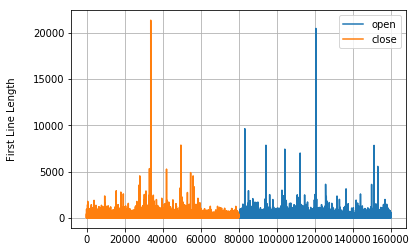

In [111]:
plt.figure()

plt.plot(openData['firstLineLength'], label = 'open')
plt.plot(closeData['firstLineLength'], label = 'close')
plt.ylabel('First Line Length\n')
plt.legend()
plt.grid(True)

plt.show()

					No. of Questions vs Length of first line



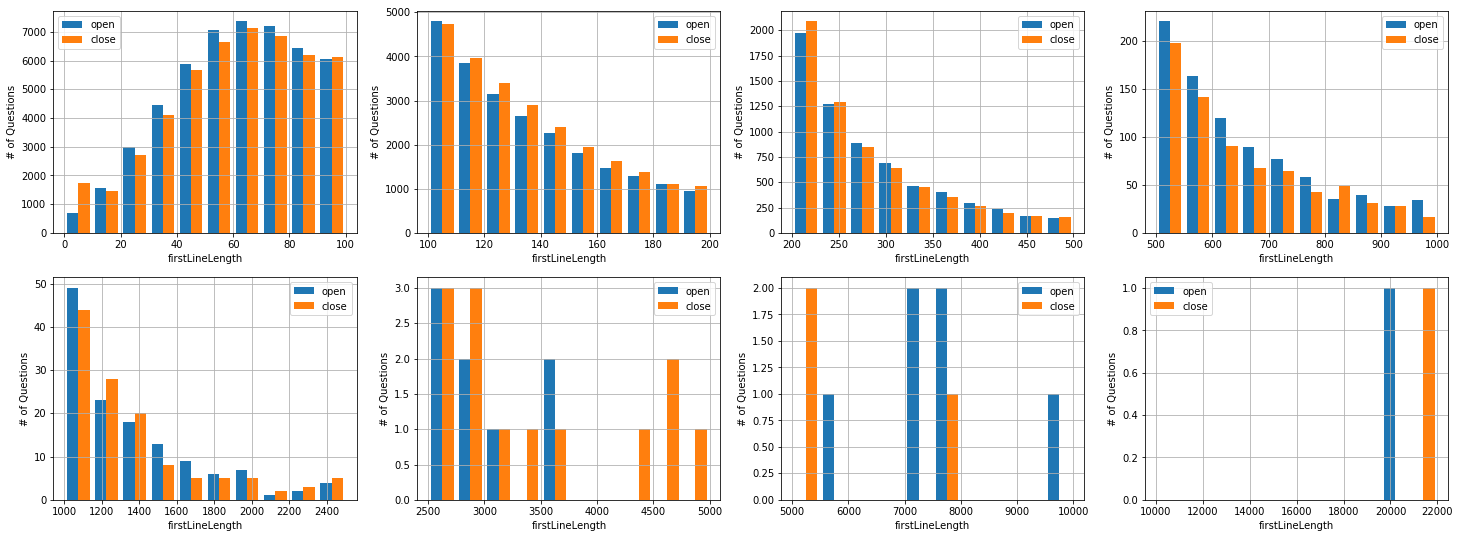

In [129]:
print('\t\t\t\t\tNo. of Questions vs Length of first line\n')

plt.figure(figsize = (25,9))
range_list = [(0,100),(100,200),(200,500),(500,1000),(1000,2500),(2500,5000),(5000,10000),(10000,22000)]

for i in range(8):
    plt.subplot(2, 4, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'firstLineLength')
    
plt.show()

### 4. Code Length

In [113]:
max_code_len_o = np.max(openData['codeLength'])
min_code_len_o = np.min(openData['codeLength'])
avg_code_len_o = np.mean(openData['codeLength'])
max_code_len_c = np.max(closeData['codeLength'])
min_code_len_c = np.min(closeData['codeLength'])
avg_code_len_c = np.mean(closeData['codeLength'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_code_len_o) + '\t\t' + str(max_code_len_c))
print('Minimum\t\t' + str(min_code_len_o) + '\t\t' + str(min_code_len_c))
print('Average\t\t' + str(avg_code_len_o) + '\t' + str(avg_code_len_c))
print('Mode\t\t' + str(stat.mode(openData['codeLength'])) + '\t\t' + str(stat.mode(closeData['codeLength'])))
print('Median\t\t' + str(stat.median(openData['codeLength'])) + '\t\t' + str(stat.median(closeData['codeLength'])))

Value		Open		Close
Maximum		29331		30890
Minimum		0		0
Average		777.98405	359.06159057952897
Mode		0		0
Median		308.0		5.0


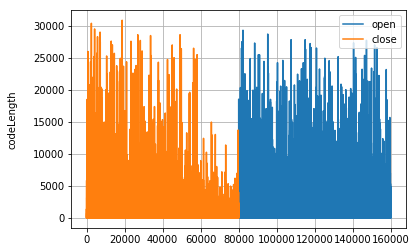

In [114]:
plt.figure()

plt.plot(openData['codeLength'], label = 'open')
plt.plot(closeData['codeLength'], label = 'close')
plt.ylabel('codeLength\n')
plt.legend()
plt.grid(True)

plt.show()

### 5. URL Count

In [115]:
max_url_o = np.max(openData['urlCount'])
min_url_o = np.min(openData['urlCount'])
avg_url_o = np.mean(openData['urlCount'])
max_url_c = np.max(closeData['urlCount'])
min_url_c = np.min(closeData['urlCount'])
avg_url_c = np.mean(closeData['urlCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_url_o) + '\t\t' + str(max_url_c))
print('Minimum\t\t' + str(min_url_o) + '\t\t' + str(min_url_c))
print('Average\t\t' + str(avg_url_o) + '\t' + str(avg_url_c))
print('Mode\t\t' + str(stat.mode(openData['urlCount'])) + '\t\t' + str(stat.mode(closeData['urlCount'])))
print('Median\t\t' + str(stat.median(openData['urlCount'])) + '\t\t' + str(stat.median(closeData['urlCount'])))

Value		Open		Close
Maximum		181		60
Minimum		0		0
Average		0.1741125	0.20977298864943247
Mode		0		0
Median		0.0		0.0


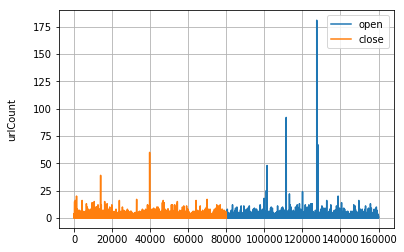

In [116]:
plt.figure()

plt.plot(openData['urlCount'], label = 'open')
plt.plot(closeData['urlCount'], label = 'close')
plt.ylabel('urlCount\n')
plt.legend()
plt.grid(True)

plt.show()

### 6. # SO URLs

In [117]:
max_so_url_o = np.max(openData['SOUrlCount'])
min_so_url_o = np.min(openData['SOUrlCount'])
avg_so_url_o = np.mean(openData['SOUrlCount'])
max_so_url_c = np.max(closeData['SOUrlCount'])
min_so_url_c = np.min(closeData['SOUrlCount'])
avg_so_url_c = np.mean(closeData['SOUrlCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_so_url_o) + '\t\t' + str(max_so_url_c))
print('Minimum\t\t' + str(min_so_url_o) + '\t\t' + str(min_so_url_c))
print('Average\t\t' + str(avg_so_url_o) + '\t' + str(avg_so_url_c))
print('Mode\t\t' + str(stat.mode(openData['SOUrlCount'])) + '\t\t' + str(stat.mode(closeData['SOUrlCount'])))
print('Median\t\t' + str(stat.median(openData['SOUrlCount'])) + '\t\t' + str(stat.median(closeData['SOUrlCount'])))

# Questions having more than 4 SO URL are closed

Value		Open		Close
Maximum		4		13
Minimum		0		0
Average		0.0014875	0.029501475073753686
Mode		0		0
Median		0.0		0.0


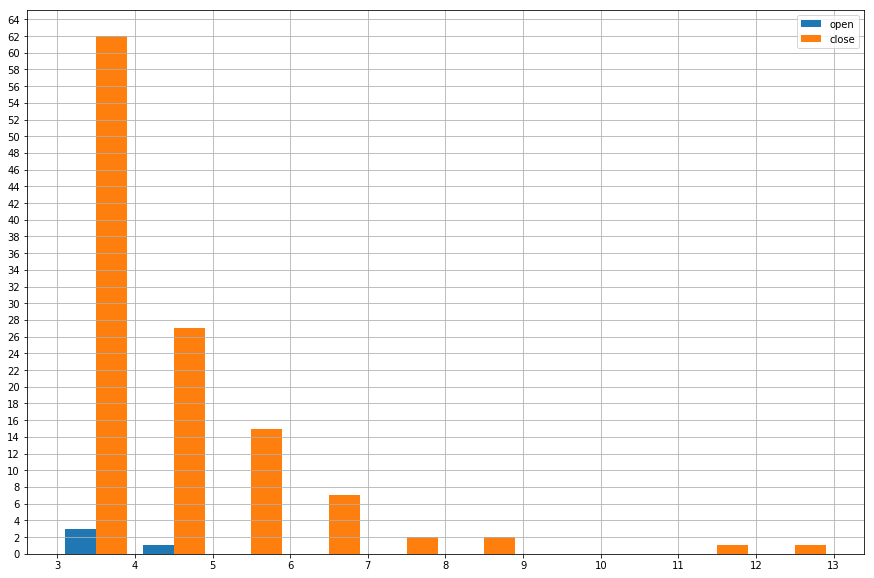

In [118]:
plt.figure(figsize=(15,10))
plt.hist([openData['SOUrlCount'], closeData['SOUrlCount']], range = (3,13), label = ['open', 'close'])
plt.legend()
plt.xticks(range(3,14))
plt.yticks(range(0,65,2))
plt.grid(True)

# Questions having SO URL are more likely to be closed 

### 6. # Sentences starting with I

In [119]:
max_start_i_o = np.max(openData['sentencesStartWithICount'])
min_start_i_o = np.min(openData['sentencesStartWithICount'])
avg_start_i_o = np.mean(openData['sentencesStartWithICount'])
max_start_i_c = np.max(closeData['sentencesStartWithICount'])
min_start_i_c = np.min(closeData['sentencesStartWithICount'])
avg_start_i_c = np.mean(closeData['sentencesStartWithICount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_start_i_o) + '\t\t' + str(max_start_i_c))
print('Minimum\t\t' + str(min_start_i_o) + '\t\t' + str(min_start_i_c))
print('Average\t\t' + str(avg_start_i_o) + '\t' + str(avg_start_i_c))
print('Mode\t\t' + str(stat.mode(openData['sentencesStartWithICount'])) + '\t\t' + str(stat.mode(closeData['sentencesStartWithICount'])))
print('Median\t\t' + str(stat.median(openData['sentencesStartWithICount'])) + '\t\t' + str(stat.median(closeData['sentencesStartWithICount'])))

# Questions having more than 15 senetences starting with I are closed

Value		Open		Close
Maximum		15		22
Minimum		0		0
Average		1.52795	1.2851642582129106
Mode		1		1
Median		1.0		1.0


				No. of Questions vs Sentence Count starting with I



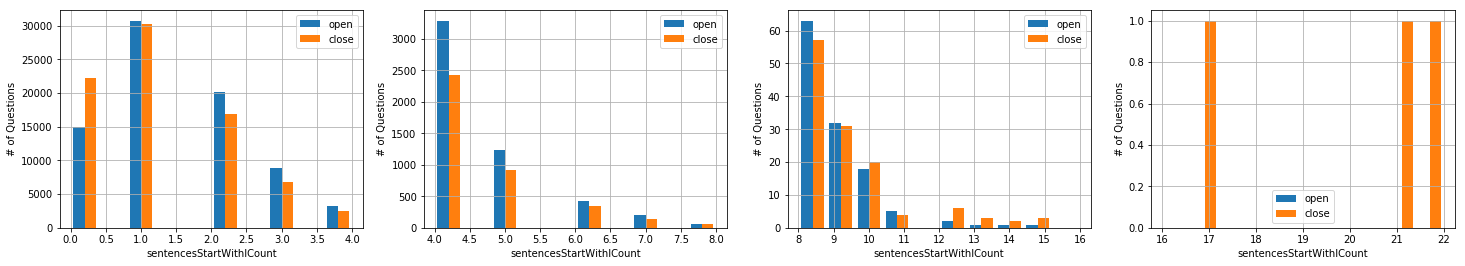

In [120]:
print('\t\t\t\tNo. of Questions vs Sentence Count starting with I\n')

plt.figure(figsize = (25,4))
range_list = [(0,4),(4,8),(8,16),(16,22)]

for i in range(4):
    plt.subplot(1, 4, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'sentencesStartWithICount')
    
plt.show()

### 7. # Sentences starting with You

In [121]:
max_start_u_o = np.max(openData['sentencesStartWithYouCount'])
min_start_u_o = np.min(openData['sentencesStartWithYouCount'])
avg_start_u_o = np.mean(openData['sentencesStartWithYouCount'])
max_start_u_c = np.max(closeData['sentencesStartWithYouCount'])
min_start_u_c = np.min(closeData['sentencesStartWithYouCount'])
avg_start_u_c = np.mean(closeData['sentencesStartWithYouCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_start_u_o) + '\t\t' + str(max_start_u_c))
print('Minimum\t\t' + str(min_start_u_o) + '\t\t' + str(min_start_u_c))
print('Average\t\t' + str(avg_start_u_o) + '\t' + str(avg_start_u_c))
print('Mode\t\t' + str(stat.mode(openData['sentencesStartWithYouCount'])) + '\t\t' + str(stat.mode(closeData['sentencesStartWithYouCount'])))
print('Median\t\t' + str(stat.median(openData['sentencesStartWithYouCount'])) + '\t\t' + str(stat.median(closeData['sentencesStartWithYouCount'])))

# Questions having sentences starting with You are likely to be closed

Value		Open		Close
Maximum		0		18
Minimum		0		0
Average		0.0	0.004025201260063003
Mode		0		0
Median		0.0		0.0


### 8. # Characters in Title

In [122]:
max_title_len_o = np.max(openData['titleLengthInChars'])
min_title_len_o = np.min(openData['titleLengthInChars'])
avg_title_len_o = np.mean(openData['titleLengthInChars'])
max_title_len_c = np.max(closeData['titleLengthInChars'])
min_title_len_c = np.min(closeData['titleLengthInChars'])
avg_title_len_c = np.mean(closeData['titleLengthInChars'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_title_len_o) + '\t\t' + str(max_title_len_c))
print('Minimum\t\t' + str(min_title_len_o) + '\t\t' + str(min_title_len_c))
print('Average\t\t' + str(avg_title_len_o) + '\t' + str(avg_title_len_c))
print('Mode\t\t' + str(stat.mode(openData['titleLengthInChars'])) + '\t\t' + str(stat.mode(closeData['titleLengthInChars'])))
print('Median\t\t' + str(stat.median(openData['titleLengthInChars'])) + '\t\t' + str(stat.median(closeData['titleLengthInChars'])))

Value		Open		Close
Maximum		150		150
Minimum		6		6
Average		52.5824875	49.91368318415921
Mode		44		40
Median		50.0		47.0


### 10. # Interrogative Sentences


### 11. # Short Words


### 12. # Words in body


### 13. # Punctuations